In [29]:
# Import modules
#layer by layer(features) to draw a map or picture
#according to the question, choose projictioin
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray

In [30]:
# Load the netCDF4 file
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
# Check the data
ds
# Use the latest monthly data
surface_T = ds.tas.isel(time=3)
surface_T

D:\app\anaconda\envs\ese5023\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.DataArray 'tas' (lat: 192, lon: 288)>
[55296 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 2000-04-15 00:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [31]:
# Plate Carree projection
ccrs.PlateCarree()

<Derived Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# Show more details of the Plate Carree projection
print(ccrs.PlateCarree())

+proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs


In [33]:
# Check the projection
ccrs.PlateCarree?

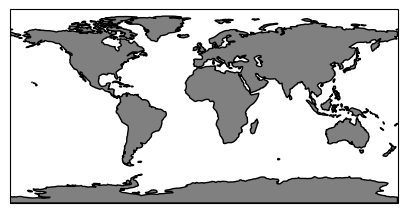

In [34]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add LAND feature to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', 
               zorder=0)

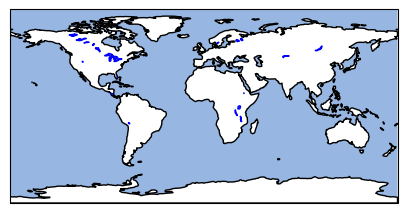

In [35]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND , edgecolor='black', facecolor='white', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue' , facecolor='grey', zorder=2)

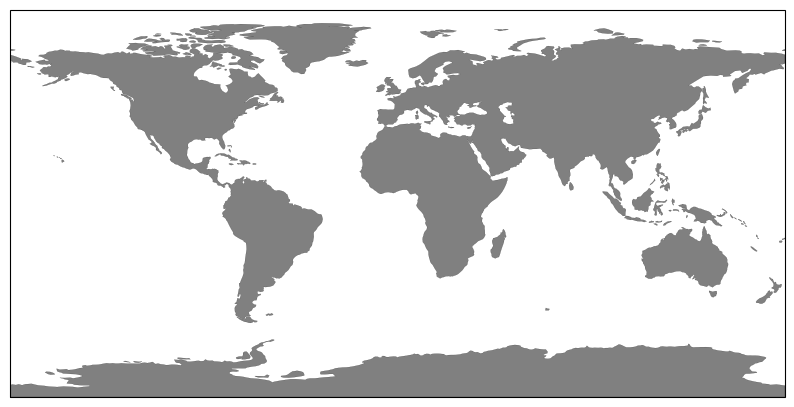

In [36]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                           name='land',
                                           scale='110m',
                                           facecolor='gray',
                                           edgecolor='black',
                                           linewidth=0.1))

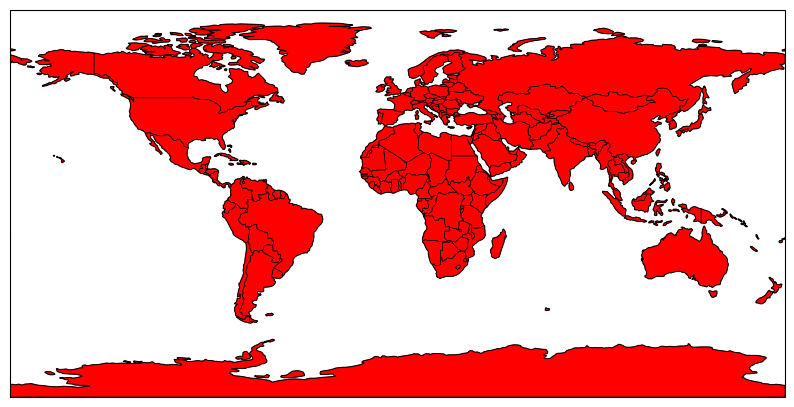

In [37]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                           name='land',
                                           scale='110m',
                                           facecolor='gray',
                                           edgecolor='black',
                                           linewidth=1))

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='red',
                                           edgecolor='black',
                                           linewidth=0.5))

In [38]:
# Check help
help(cfeature.NaturalEarthFeature)

Help on class NaturalEarthFeature in module cartopy.feature:

class NaturalEarthFeature(Feature)
 |  NaturalEarthFeature(category, name, scale, **kwargs)
 |  
 |  A simple interface to Natural Earth shapefiles.
 |  
 |  See https://www.naturalearthdata.com/
 |  
 |  Method resolution order:
 |      NaturalEarthFeature
 |      Feature
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, category, name, scale, **kwargs)
 |      Parameters
 |      ----------
 |      category
 |          The category of the dataset, i.e. either 'cultural' or 'physical'.
 |      name
 |          The name of the dataset, e.g. 'admin_0_boundary_lines_land'.
 |      scale
 |          The dataset scale, i.e. one of '10m', '50m', or '110m',
 |          or Scaler object. Dataset scales correspond to 1:10,000,000,
 |          1:50,000,000, and 1:110,000,000 respectively.
 |      
 |      Other Parameters
 |      ----------------
 |      **kwargs
 |          Keyword arguments to be used wh

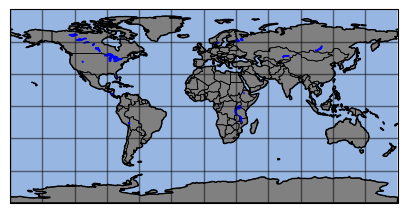

In [39]:
# Now let’s put all features together

# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax   = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND , edgecolor='black', facecolor='grey', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines
# Draw gridlines, the gridlines need to be plotted with the SAME project!
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

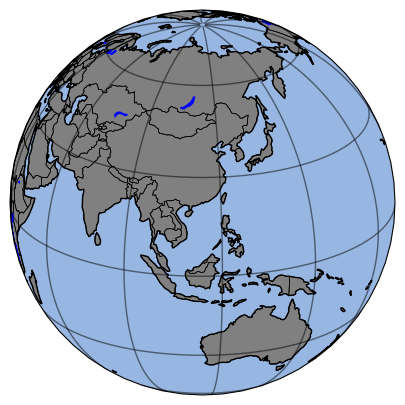

In [40]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic(114.06, 22.54)         
ax   = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND , edgecolor='black', facecolor='grey', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue' , facecolor='blue', zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

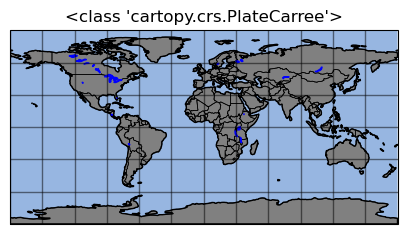

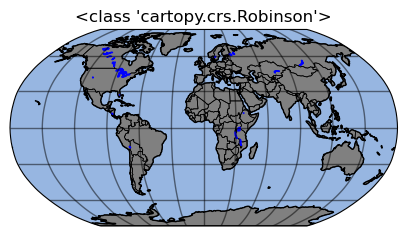

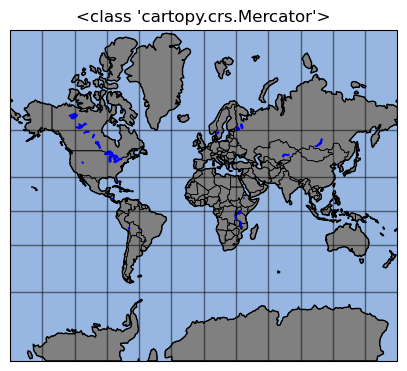

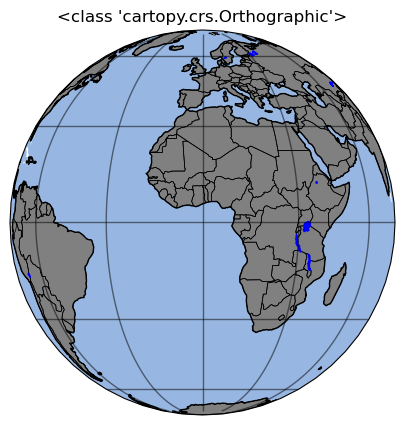

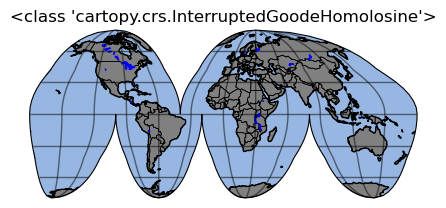

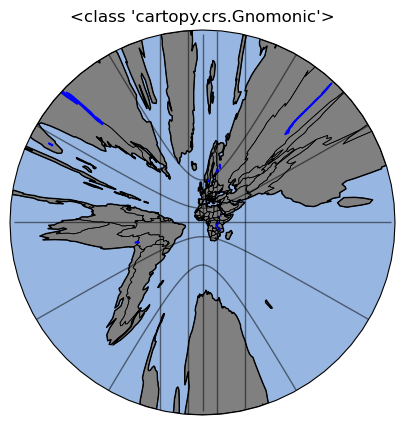

In [41]:
# Define plotting function
def plot_map(my_projection):
    # Create and define the size of a figure object 
    plt.figure(figsize=(5,5), dpi=100)
    
    # Create an axes with Orthographic projection style
    ax = plt.axes(projection=my_projection)

    # Add natural features to axes using cartopy.feature (cfeature)
    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
    ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

    # Add border lines over countries 
    ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

    # Add lat/lon gridlines，draw gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

    # Manipulate latitude and longitude gridline numbers and spacing
    gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
    
    ax.set_title(f'{type(my_projection)}')
    
# Set a list of projections
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.Gnomonic()
              ]

# Loop the projections and plot
for proj in projections:
    plot_map(proj)

In [42]:
help(ax.set_extent)

Help on method set_extent in module cartopy.mpl.geoaxes:

set_extent(extents, crs=None) method of cartopy.mpl.geoaxes.GeoAxes instance
    Set the extent (x0, x1, y0, y1) of the map in the given
    coordinate system.
    
    If no crs is given, the extents' coordinate system will be assumed
    to be the Geodetic version of this axes' projection.
    
    Parameters
    ----------
    extents
        Tuple of floats representing the required extent (x0, x1, y0, y1).


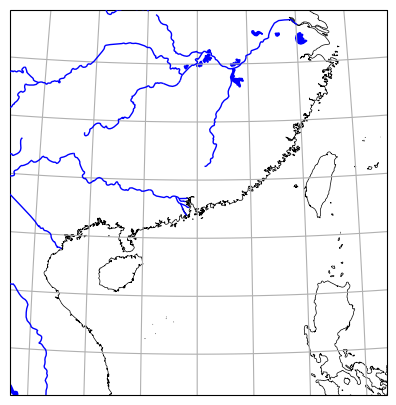

In [43]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES , edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines()

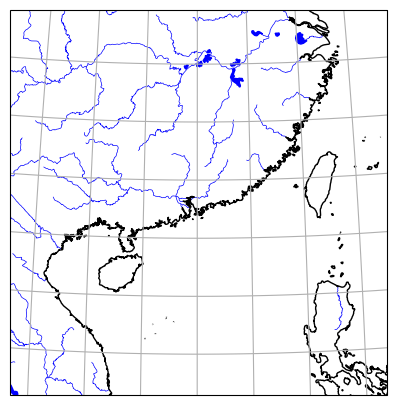

In [44]:
# Now use higher-resolution features
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)

# Add features to axes using coastlines method
ax.coastlines(resolution='10m')
ax.gridlines()

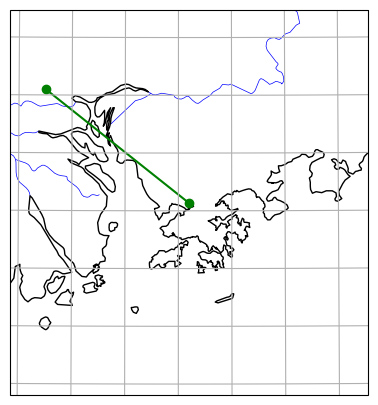

In [45]:
# Create some test data
Shenzhen  = dict(lon=114.06, lat=22.54)
Guangzhou = dict(lon=113.25, lat=23.13)
lons = [Shenzhen['lon'], Guangzhou['lon']]
lats = [Shenzhen['lat'], Guangzhou['lat']]

# Now use higher-resolution features
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-1, central_lon+1, central_lat-1, central_lat+1]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)

# Add features to axes using coastlines method
ax.coastlines(resolution='10m')
ax.gridlines()

# Add two points,remember to point out the projection
ax.plot(lons, lats, 'go-', transform=ccrs.PlateCarree())

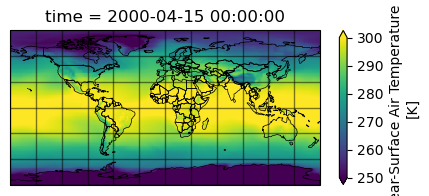

In [46]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with Orthographic projection style
#proj = ccrs.Orthographic(central_lon, central_lat) 
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)

# Plot the surface temperature
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

Text(0.5, 1.0, 'No mask data only')

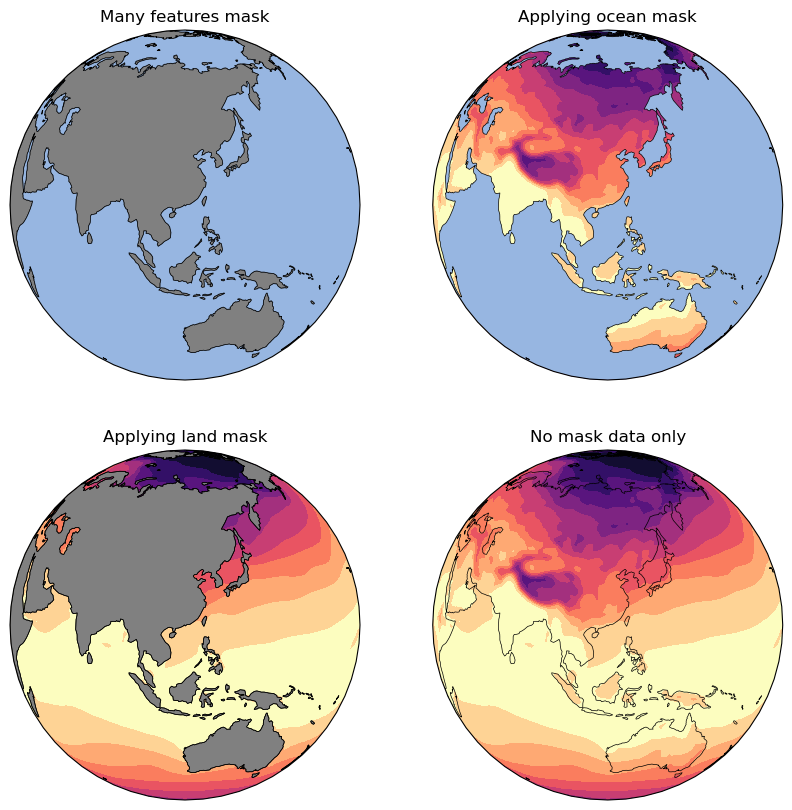

In [47]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic(central_lon, central_lat) 

# Plot first panel
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.coastlines(linewidths=0.5)
# Mask land, lakes, and oceans
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', linewidths=0.5)
ax1.add_feature(cfeature.OCEAN)
plt.title("Many features mask")

# Plot second plot
ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)

# Mask ocean data by adding ocean feature and changing its zorder
ax2.add_feature(cfeature.OCEAN, zorder=1)
plt.title("Applying ocean mask")

# Plot third plot
ax3 = plt.subplot(2, 2, 3, projection=proj)
ax3.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)
# Mask land data by adding land feature and changing its zorder
ax3.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',
                linewidths=0.5, zorder=1)
plt.title("Applying land mask")

# Plot fourth plot
ax4 = plt.subplot(2, 2, 4, projection=proj)
ax4.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)
plt.title("No mask data only")

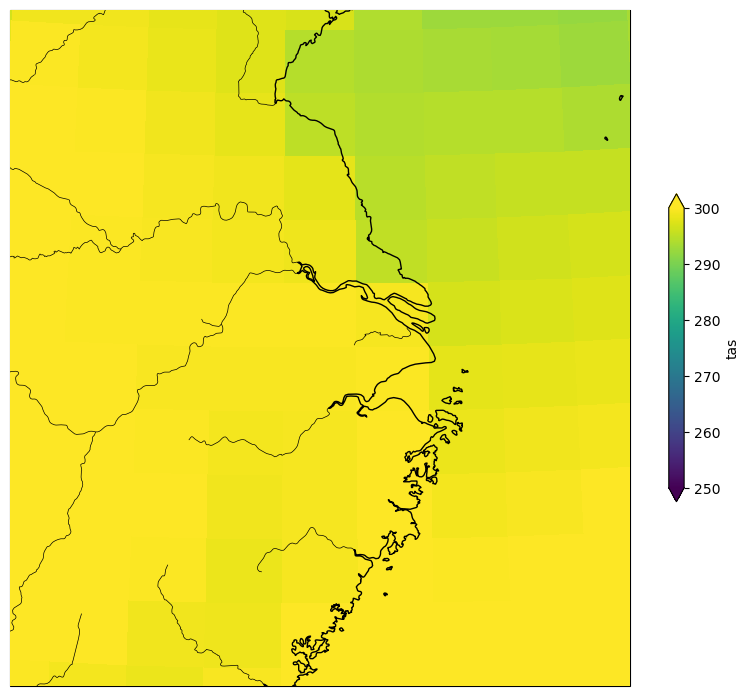

In [48]:
# exercise
# define the domain
central_lon, central_lat = 120 ,31
extent = [central_lon - 5, central_lon + 5, central_lat - 5, central_lat + 5]

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon, central_latitude=central_lat))
ax.set_extent(extent)
T = ds.tas.sel(time=ds.time.dt.month == 6).sel(time=slice('2000','2010'))
T_mean=T.mean(dim='time')
T_mean.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4},zorder =3)



# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='black', linewidth=0.5, zorder=3)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                           name='land',
                                           scale='10m',
                                           facecolor='gray',
                                           edgecolor='black',
                                           linewidth=1),zorder=1)
ax.coastlines(resolution='10m',zorder=5)
ax.gridlines()
# Plot the surface temperature

In [49]:
T

<xarray.DataArray 'tas' (time: 11, lat: 192, lon: 288)>
array([[[221.71727, 221.71727, ..., 221.71727, 221.71727],
        [222.74634, 222.71442, ..., 222.75177, 222.74933],
        ...,
        [272.1785 , 272.18628, ..., 272.162  , 272.17044],
        [272.1437 , 272.1441 , ..., 272.14276, 272.14325]],

       [[220.57294, 220.57294, ..., 220.57294, 220.57294],
        [220.99765, 220.97064, ..., 221.00194, 221.0022 ],
        ...,
        [272.2797 , 272.2763 , ..., 272.28604, 272.28293],
        [272.16116, 272.16132, ..., 272.16086, 272.161  ]],

       ...,

       [[214.31972, 214.31972, ..., 214.31972, 214.31972],
        [214.37906, 214.35703, ..., 214.36954, 214.375  ],
        ...,
        [272.5728 , 272.57254, ..., 272.57263, 272.5728 ],
        [272.43268, 272.4331 , ..., 272.4317 , 272.43222]],

       [[216.18988, 216.18988, ..., 216.18988, 216.18988],
        [216.91833, 216.88489, ..., 216.93045, 216.92583],
        ...,
        [272.45078, 272.4505 , ..., 272.45096, 272.451  ],
        [272.46347, 272.4634 , ..., 272.4636 , 272.46353]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-06-15 00:00:00 ... 2010-06-15 00:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [50]:
T

<xarray.DataArray 'tas' (time: 11, lat: 192, lon: 288)>
array([[[221.71727, 221.71727, ..., 221.71727, 221.71727],
        [222.74634, 222.71442, ..., 222.75177, 222.74933],
        ...,
        [272.1785 , 272.18628, ..., 272.162  , 272.17044],
        [272.1437 , 272.1441 , ..., 272.14276, 272.14325]],

       [[220.57294, 220.57294, ..., 220.57294, 220.57294],
        [220.99765, 220.97064, ..., 221.00194, 221.0022 ],
        ...,
        [272.2797 , 272.2763 , ..., 272.28604, 272.28293],
        [272.16116, 272.16132, ..., 272.16086, 272.161  ]],

       ...,

       [[214.31972, 214.31972, ..., 214.31972, 214.31972],
        [214.37906, 214.35703, ..., 214.36954, 214.375  ],
        ...,
        [272.5728 , 272.57254, ..., 272.57263, 272.5728 ],
        [272.43268, 272.4331 , ..., 272.4317 , 272.43222]],

       [[216.18988, 216.18988, ..., 216.18988, 216.18988],
        [216.91833, 216.88489, ..., 216.93045, 216.92583],
        ...,
        [272.45078, 272.4505 , ..., 272.45096, 272.451  ],
        [272.46347, 272.4634 , ..., 272.4636 , 272.46353]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-06-15 00:00:00 ... 2010-06-15 00:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [52]:
#lab
ds.tas.hvplot()

:NdOverlay   [Element]
   :Histogram   [tas]   (tas_count)